<a href="https://colab.research.google.com/github/raunakyadav92/timeseries/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📈 What is Time Series?
Definition :
A Time Series is a sequence of data points collected or recorded at regular time intervals. These data points are typically measured over time, such as daily, monthly, or yearly, and are used to analyze patterns, trends, and forecasts.

Hinglish Explanation:
Time Series ek aisa data hota hai jo samay ke sath record kiya gaya hota hai. Jaise har din ka temperature, har mahine ka sales data, ya har second ka stock price. Isme time ka order bahut important hota hai — purana data pehle aata hai aur naye data baad mein.

Time Series analysis ka use hum karte hain:

Future ko predict karne ke liye (forecasting)
Trend aur seasonality samajhne ke liye
Anomaly detection ke liye
Examples:

Daily temperature records
Monthly electricity bills
Yearly rainfall data
Stock market prices over time
📌 Note: Time Series me time ka sequence sabse important hota hai. Agar time order galat ho gaya to analysis bhi galat ho jaata hai.

🔍 Why is Time Series Different from Regular Data?
Definition (English):
Time Series data is different from regular data because it has a time-based order, and the sequence of data points matters. In regular (non-time series) data, the order of rows doesn't usually affect the analysis. But in time series, each data point depends on the previous one — this introduces concepts like trends, seasonality, and autocorrelation.

Hinglish Explanation:
Time Series data normal data se isliye alag hota hai kyunki isme time ka order important hota hai. Har value ka relation pichhli values se hota hai. Normal data (jaise ki kisi student ka naam, age, marks) me order matter nahi karta, lekin Time Series me agar order ulta ho gaya to result galat aa sakta hai.

Key Differences:

🕒 Time Dependency: Time Series me har point ka link previous points se hota hai
🔁 Autocorrelation: Past values current values ko influence karti hain
📉 Trends & Seasonality: Time Series me pattern repeat ho sakte hain (like har saal summer me AC ki sales badhna)
🔀 Order Matters: Normal data me rows ka order badalne se farak nahi padta, Time Series me padta hai
⚠️ Remember: Time Series ko analyse karne ke liye special tools lagte hain jaise moving average, ARIMA, LSTM etc., jo normal datasets pe use nahi hote.

🧠 Applications of Time Series
Definition (English):
Time Series analysis is widely used in real-world applications where data changes over time. It helps in forecasting future values, detecting patterns, and understanding the behavior of systems over time.

Hinglish Explanation:
Time Series ka use un jagah hota hai jahan data time ke sath badalta hai. Iska main kaam hota hai future ka prediction karna aur samay ke sath data me jo patterns hain unhe pakadna.

📌 Real-Life Applications:

📈 Stock Market Prediction

Share prices, trading volume, volatility prediction over time
Example: Nifty 50 ya Tesla stock ka daily price trend
🌦️ Weather Forecasting

Temperature, rainfall, humidity ke daily/monthly/yearly trends
Example: Barish kab hogi ya heatwave ka pattern samajhna
❤️ ECG / Health Monitoring

Heartbeat signals, blood pressure, glucose levels vs time
Example: Kisi patient ka 24-hour heart monitoring graph
🧠 EEG (Electroencephalogram)

Brain ke electrical signals ko time ke sath measure kiya jata hai
Example: Dimaag ki activity detect karna during sleep ya epilepsy ke liye
Iska use AI aur ML models me hota hai brain-computer interface banane ke liye
🛍️ Sales Forecasting

Daily/weekly/monthly product sales data for future demand planning
Example: Amazon ya Walmart ka sales trend during festive season
⚡ Energy Consumption

Electricity usage over time in homes/factories
Example: Ghar ka daily bijli bill ya smart meter readings
🏭 IoT Sensor Data

Real-time data from machines, vehicles, smart devices
Example: Car ka speed, fuel level, or tyre pressure over time
🔍 In sabhi applications me time ka role bahut important hota hai — isi liye Time Series ka use hota hai.



In [2]:
#Block 1
#Step 1 - Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


📊 Time Series Basics
✅ Load a Sample Time Series Dataset
Hum yaha ek Airline Passengers Dataset use karenge jo monthly passenger count data hai.

<Axes: title={'center': 'Airline Passenger Traffic'}, xlabel='Month'>

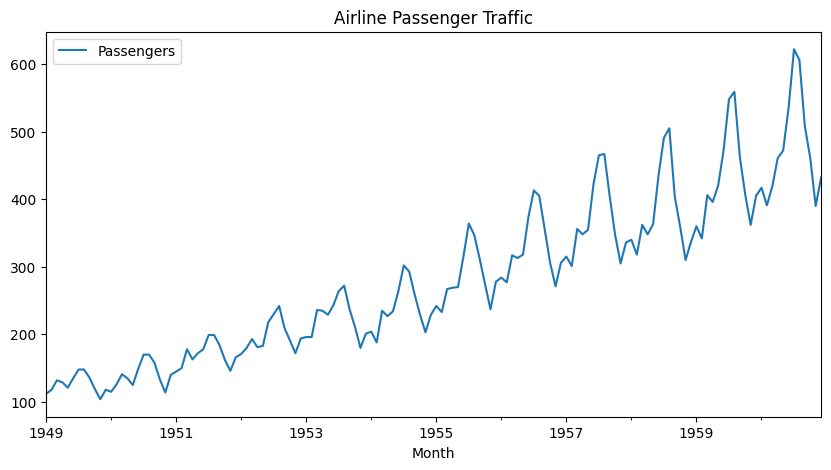

In [3]:
#Block 2

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.plot(figsize=(10,5), title="Airline Passenger Traffic")

🔍 Explain Key Concepts
📈 Trend
English:
A trend is the long-term increase or decrease in the data over time.

Hinglish:
Trend matlab data ka dheere dheere badhna ya ghatna. Jaise airline passengers ka total number har saal badhta jaa raha hai.

👉 Graph me agar upward ya downward slope dikhe to woh trend hota hai.

🔄 Seasonality
English:
Seasonality refers to repeating short-term cycles in the data that occur at regular intervals.

Hinglish:
Seasonality matlab data ka kuch specific pattern har ek season ya time pe repeat hona. Jaise har saal summer vacations ke time passenger count badh jaata hai.

👉 Airline dataset me har saal kuch mahino me peak aata hai — that’s seasonality.

🌪️ Residuals (Noise)
English:
Residuals are the random variations in data that cannot be explained by trend or seasonality.

Hinglish:
Residuals ya noise woh choti-moti random fluctuations hoti hain jo kisi pattern ko follow nahi karti.

👉 Example: Kabhi kisi mahine passenger unexpectedly kam ya zyada ho gaye — bina kisi reason ke.

✅ Time Series = Trend + Seasonality + Residuals
🧪 Decompose Time Series into Trend, Seasonality & Residuals
Hum seasonal_decompose function use karenge statsmodels se to decompose the time series into 3 parts:

Trend
Seasonality
Residuals
✅ Required Library


!pip install statsmodels --quiet

In [4]:
##Block 3


import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.columns = ['Passengers']
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


/tmp/ipython-input-5-4062451272.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


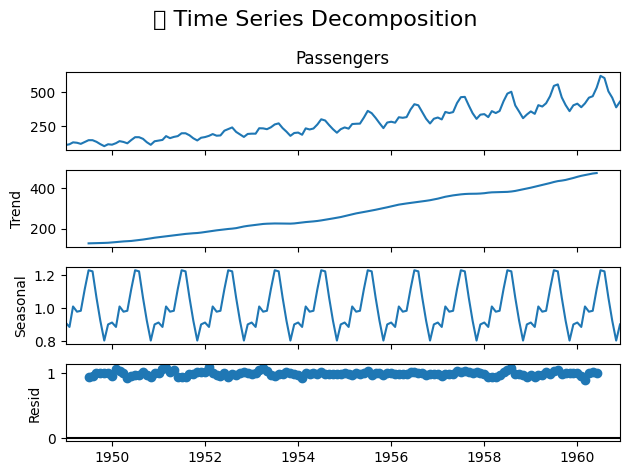

In [5]:
#Block 4

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series
result = seasonal_decompose(df['Passengers'], model='multiplicative')  # 'additive' also works
result.plot()
plt.suptitle('📊 Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

Time Series Forecasting using ARIMA
2️⃣ What is ARIMA?

ARIMA ka full form hai:

AR: Auto Regressive
I: Integrated (for making data stationary)
MA: Moving Average
Yeh ek classical statistical model hai jo past values + past errors ka use karke future values predict karta hai.

3️⃣ ARIMA Components (p, d, q)
p (AR - Auto Regressive): Kitne past values ka use kare
d (I - Integrated): Kitni baar differencing chahiye data ko stationary banane ke liye
q (MA - Moving Average): Kitne past errors ka use kare
Example: ARIMA(2,1,2) = 2 lag values, 1 differencing, 2 error lags


In [7]:
#Block 5

!pip install pandas matplotlib statsmodels

In [8]:
#Block 7

# --- Generate Dummy Time Series Data ---
date_range = pd.date_range(start='2020-01-01', periods=36, freq='M')
sales = np.random.randint(100, 200, size=36)

df = pd.DataFrame({'Date': date_range, 'Sales': sales})
df.set_index('Date', inplace=True)

/tmp/ipython-input-8-4155707366.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01', periods=36, freq='M')


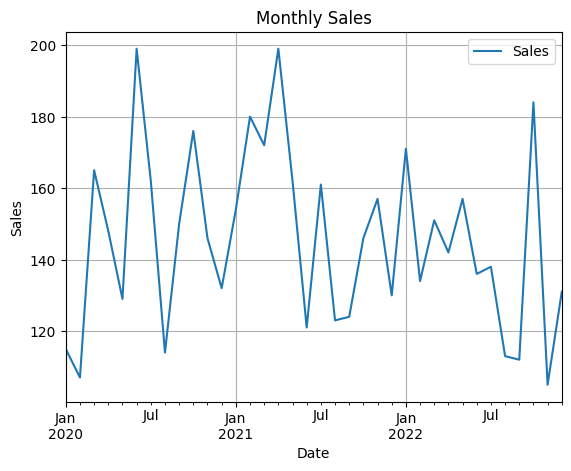

In [9]:
#Block 8

# --- Visualize Original Data ---
df.plot(title='Monthly Sales')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid()
plt.show()


ACF & PACF Plots Ye plots help karte hain p aur q values choose karne me.

ACF (AutoCorrelation Function) → q ka idea deta hai

PACF (Partial AutoCorrelation) → p ka idea deta hai

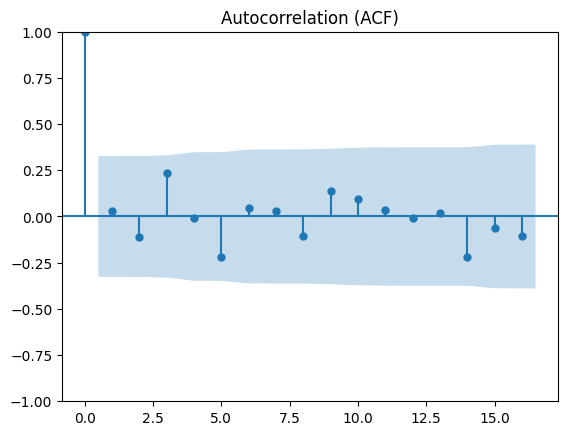

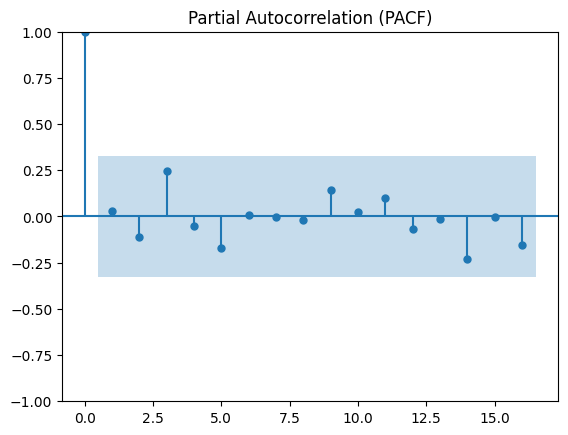

In [12]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- ACF and PACF plots (for parameter selection) ---
plot_acf(df['Sales'])
plt.title('Autocorrelation (ACF)')
plt.show()

plot_pacf(df['Sales'])
plt.title('Partial Autocorrelation (PACF)')
plt.show()


In [13]:
#Block 10

# --- Train-Test Split ---
train = df.iloc[:-6]
test = df.iloc[-6:]


In [16]:
# Step-by-step fix
train = df['Sales'].dropna()       # Step 1: Only the relevant Series and remove NaNs
train = train.astype(float)        # Step 2: Make sure it's numeric

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -164.293
Date:                Fri, 04 Jul 2025   AIC                            334.585
Time:                        13:48:21   BIC                            339.251
Sample:                    01-31-2020   HQIC                           336.196
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0285      0.232      0.123      0.902      -0.425       0.482
ma.L1         -0.9250      0.134     -6.896      0.000      -1.188      -0.662
sigma2       662.7728    185.218      3.578      0.0

In [17]:
#Block 12
# --- Forecast Next 6 Months ---
forecast = model_fit.forecast(steps=6)
forecast = pd.Series(forecast, index=test.index)


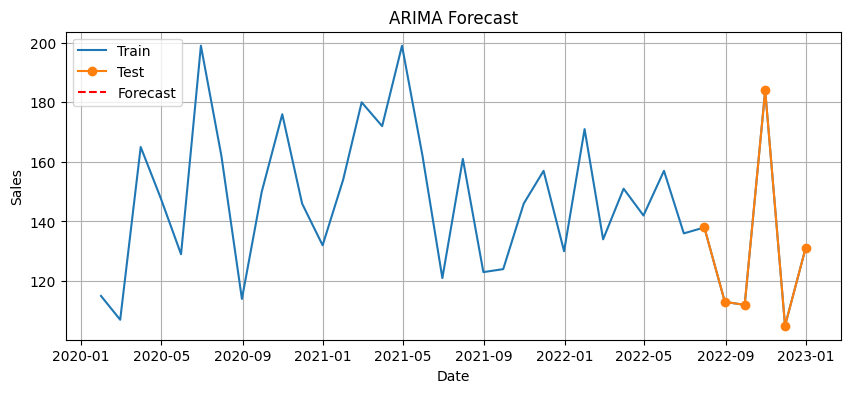

In [18]:
#Block 13
# --- Plot Forecast vs Actual ---
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test', marker='o')
plt.plot(forecast, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

Summary ARIMA model works well with stationary data

Use ACF/PACF for p and q

Use auto_arima() for easy modeling

Good for monthly/weekly forecasting tasks

🤖 Other Time Series Forecasting Algorithms

✅ Popular Time Series Algorithms (besides ARIMA)
Algorithm	Full Form	Use Case	Seasonality Support
ARIMA	AutoRegressive Integrated Moving Average	Classical, stable data	❌ (unless seasonal ARIMA)
SARIMA	Seasonal ARIMA	Seasonal time series (monthly, quarterly)	✅
Exponential Smoothing (ETS)	Error-Trend-Seasonality	Smooth short-term forecast	✅
Prophet	Facebook Prophet	Trend + holidays + seasonality (auto handling)	✅
LSTM (RNN)	Long Short-Term Memory	Deep learning for complex patterns	✅ (learns patterns itself)
XGBoost / LightGBM	Tree-based ML models	Feature-based forecasting	❌ (need feature engineering)
VAR	Vector AutoRegression	Multivariate time series (multiple columns)

❌ Why We Didn't Use Others Here?
Algo	Why Not Used?
SARIMA	More complex, similar to ARIMA but with seasonality — for beginners ARIMA is simpler
ETS	Works best with short-term, highly seasonal data — not always better than ARIMA
Prophet	Requires larger dataset and additional setup (holidays etc.) — ARIMA is lighter
LSTM	Deep learning = more data + more compute + harder tuning — overkill for small datasets
XGBoost/LightGBM	Need extra features like date parts (month, weekday), not pure time series modeling


💡 When to Try Other Models?
Try This	If...
SARIMA	Your dataset has strong seasonality (monthly patterns, repeated yearly peaks)
Prophet	You want easy handling of trend + seasonality + holiday effects
LSTM / RNNs	You have LOTS of data (1000+ rows) and complex patterns
XGBoost	You want to mix time series with external features (e.g., promotions, temperature, etc.)


📚 Suggestions for Students
👉 Start with ARIMA to understand basics
👉 Then try SARIMA if seasonality is visible
👉 Explore Facebook Prophet for real-life business forecasting
👉 Finally go to LSTM or XGBoost if you have:

Large dataset
External features
High complexity
🧠 Final Tip:
"Every dataset behaves differently."
Try multiple models and compare using metrics like MAE, RMSE, MAPE

📌 Don't forget to visualize residuals and check assumptions before trusting any forecast!

🧠📊 EEG-based Neuromarketing using Time Series Analysis
🧪 What is Neuromarketing?
Neuromarketing is the science of understanding consumer behavior by observing brain responses. In my research, we collected EEG (Electroencephalography) signals from participants while they interacted with various advertisements, products, or brand elements. The goal was to capture real-time brain activity that reflects emotions, attention, and decision-making.

🧠 How EEG Data Works
EEG data is recorded from multiple electrodes placed on the scalp.
Each electrode produces a time series signal representing the electrical activity of the brain at that location.
The data is high-frequency (e.g., 128 Hz or 256 Hz), meaning we get hundreds of readings per second.
This allows us to study rapid emotional and cognitive changes with millisecond precision.
📈 Why Time Series?
EEG signals are inherently temporal — they evolve over time.

We treat EEG as multivariate time series, where:

Each channel (e.g., F3, P4, O1) is a separate time series.
The sampling rate defines the granularity (e.g., 256 samples per second).
Events like product preference, emotional spikes, or cognitive load appear as patterns in these series.
🔍 How We Used Time Series Analysis
Preprocessing: We applied bandpass filters to isolate alpha, beta, and theta brainwaves (frequency-specific time series).
Segmentation: We segmented EEG time series into event-related windows (e.g., 2 seconds before and after a stimulus).
Feature Extraction: From these time windows, we extracted features like power, peak, entropy, and frequency-domain statistics.
Forecasting or Pattern Recognition: In some cases, we even predicted attention levels or emotional shifts over time using ARIMA or deep learning models (like CNN-LSTM).
🎯 Outcome
Our time series modeling helped:

Identify when a consumer is most engaged or distracted.
Correlate EEG signals with ad recall, brand preference, and purchase intent.
Classify users’ subconscious responses with high accuracy.
🧬 In essence, EEG signals are windows into the brain, and time series analysis is the lens that helps us read them. Together, they are revolutionizing how brands understand and influence consumer decisions.

🔗📈 Link Prediction in Dynamic Social Networks
📌 Project Overview
In online forums and social platforms, understanding who might connect with whom in the future is a crucial task. In this project, I performed Link Prediction on the Facebook Forum dataset, modeling how interactions evolve over time.

This helps in:

Suggesting future friends/connections
Understanding community dynamics
Improving recommendation systems
🗃️ Dataset: Facebook Forum
Contains user interactions over time (posts, replies, mentions)
Represented as a dynamic graph where:
Nodes = users
Edges = interactions (with timestamps)
🧠 What is Link Prediction?
Given a snapshot of the network, the goal is to predict which links (edges) are likely to appear in the future. These predictions are based on node features, structure, and temporal dynamics.

⚙️ Methods Used
1. 🧮 Centrality Measures
We computed graph-theoretic features like:

Degree Centrality
Closeness Centrality
Betweenness Centrality
PageRank
These metrics help quantify a user's importance or influence in the network.

2. 🔗 Node Embeddings – Node2Vec
Used Node2Vec to learn low-dimensional embeddings of nodes that preserve their local and global structural relationships.
Embeddings capture the behavioral similarity of users in the forum.
3. 🤖 Machine Learning Models
We treated Link Prediction as a binary classification task:

Positive class: Actual future links
Negative class: Randomly sampled non-links
Used a stacking ensemble of:

XGBoost
LightGBM
CatBoost
With Optuna for hyperparameter tuning.

4. 📊 Evaluation
Train-test split done over time (temporal validation)
Metrics used: AUC-ROC, Precision@K, Recall@K
Achieved high precision in predicting likely future interactions.
🚀 Key Outcomes
Combined graph topology + embeddings + ensemble ML for state-of-the-art performance
Successfully modeled interaction dynamics in social networks
Framework generalizable to Twitter, Reddit, or any dynamic community
🔍 In essence, this project blends Network Science, Machine Learning, and Representation Learning to predict future connections in evolving social structures.

📈 Time Series Based Stock Price Prediction Project
📌 Project Title:
Stock Price Forecasting using ARIMA Model

🧠 Objective:
Predict future stock prices using Time Series Forecasting techniques, specifically the ARIMA model, and analyze the trend, seasonality, and noise present in historical stock data.

🗂️ Dataset Used:
Source: Yahoo Finance (or Kaggle/Alpha Vantage)
Stock: Example – TCS / Reliance / Tesla (as used)
Time Range: Jan 2015 to Dec 2022 (You can modify this)

import yfinance as yf
data = yf.download('TCS.NS', start='2015-01-01', end='2022-12-31')
df = data[['Close']]  # Using only closing price
df.plot(title="TCS Stock Closing Price", figsize=(10,5))

📈🧠 Time Series Forecasting using PyCaret
🚀 Why PyCaret?
PyCaret is an open-source, low-code machine learning library in Python that simplifies model training, comparison, and deployment. For time series, PyCaret offers a powerful abstraction that helps:

Automate preprocessing and feature engineering
Compare multiple forecasting models with minimal code
Handle transformations, lags, and seasonality
Deploy models in a single line
🗃️ Dataset Used
For this project, we used a univariate time series dataset:

Example: Airline Passenger Numbers (1949–1960)
This dataset records the monthly number of passengers carried by an airline company.

📦 PyCaret Time Series Workflow
1️⃣ Setting Up the Environment
We start by initializing the time series setup with:

from pycaret.time_series import *
exp = setup(data, target='value', fold=3, session_id=123)